# GRIP Task 3:


# **Exploratory Data Analysis - Retail**

**Problem Statement:Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’**

**Jasmine Boro**

In [2]:
#Importing the required libraries


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# now we read our data from the dataset
data=pd.read_csv(r"C:\Users\Jasmine\Downloads\SampleSuperstore.csv")

#now we display our records by using head function, which only display 5 records by default
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#now we check if there's any null entry in the record.

data.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**we can see, there isnt any null entry record in our dataset, hence we can move ahead with our analysis.**



# Exploratory data analysis

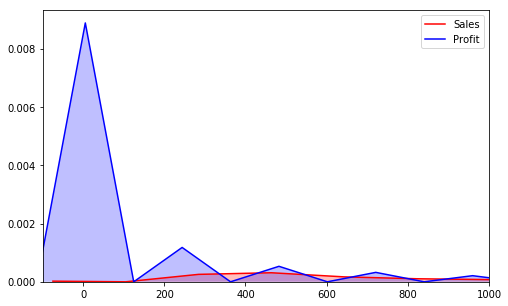

In [6]:
plt.figure(figsize=(8,5))
sns.kdeplot(data['Sales'],color='red',label='Sales', shade=True, bw=25)
sns.kdeplot(data['Profit'],color='blue',label='Profit',shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()

**Profit is amazingly more than that of sale, but in few places sales is seen to be more than profit, hence, we can work to increase the profit in this places.**

# Analysis using pairplot of each column 

**1} Based on category**

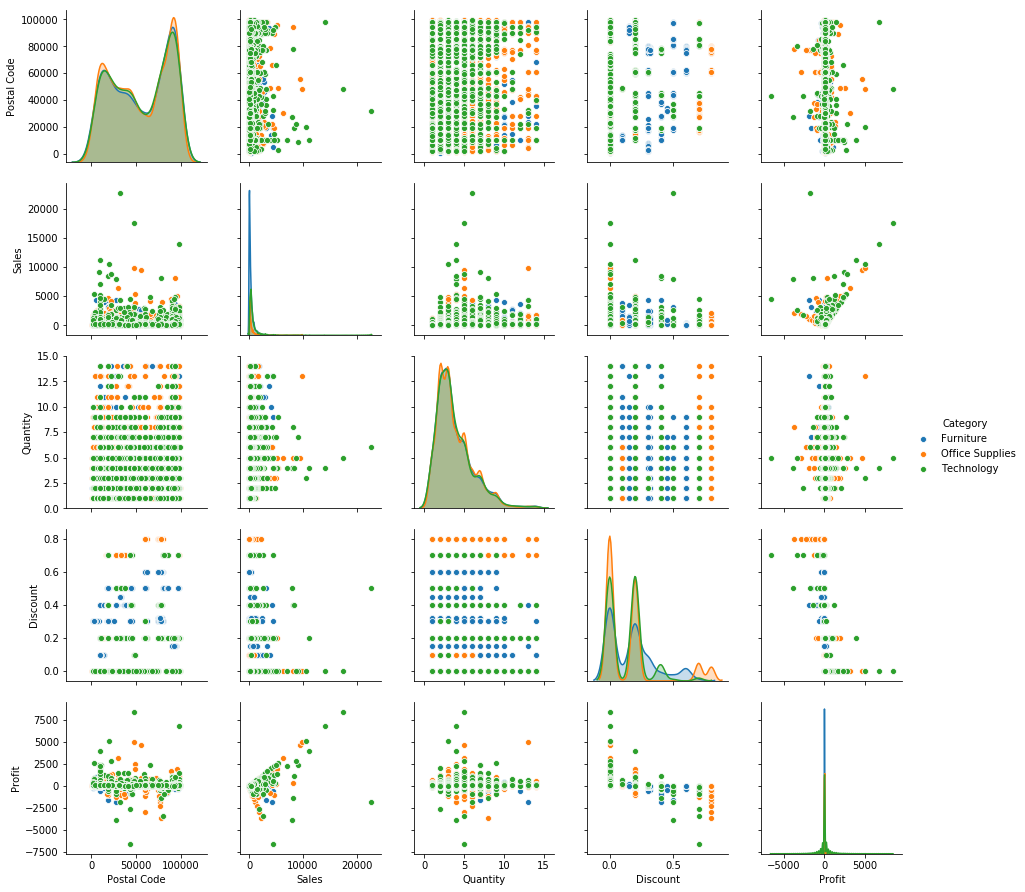

In [7]:
sns.pairplot(data,hue="Category")

**2}Based on region**

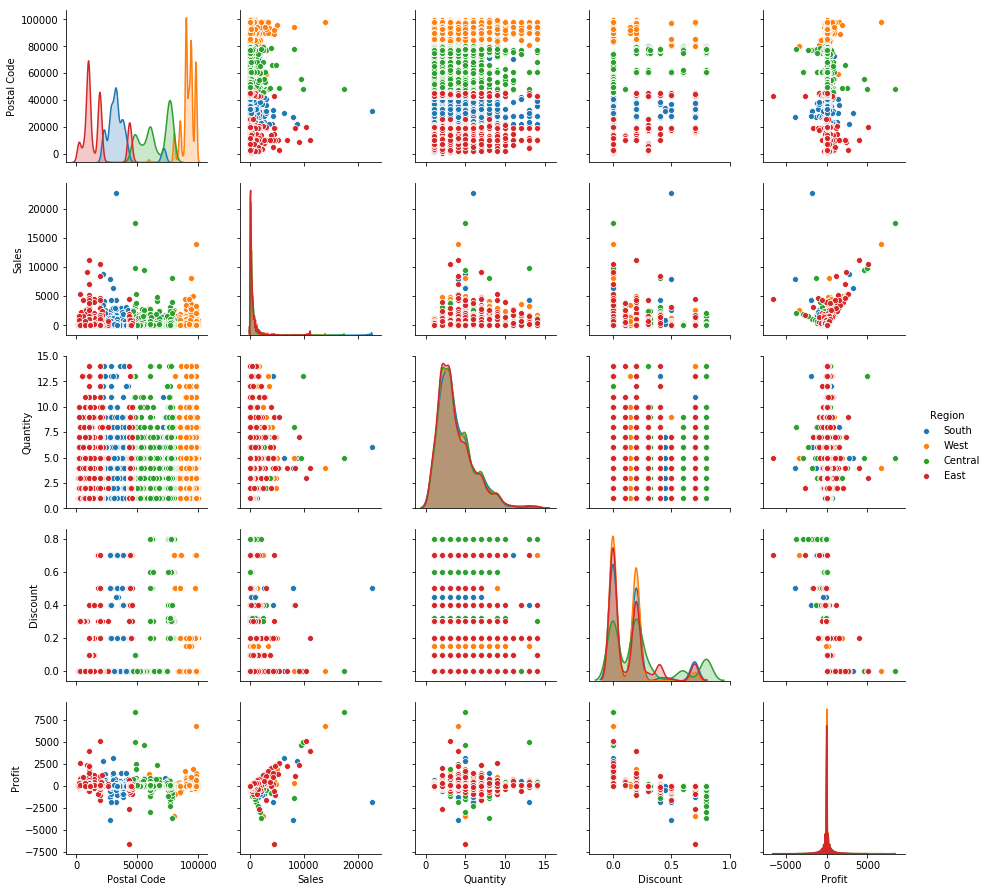

In [8]:
sns.pairplot(data,hue='Region')

**3}Based on segment**

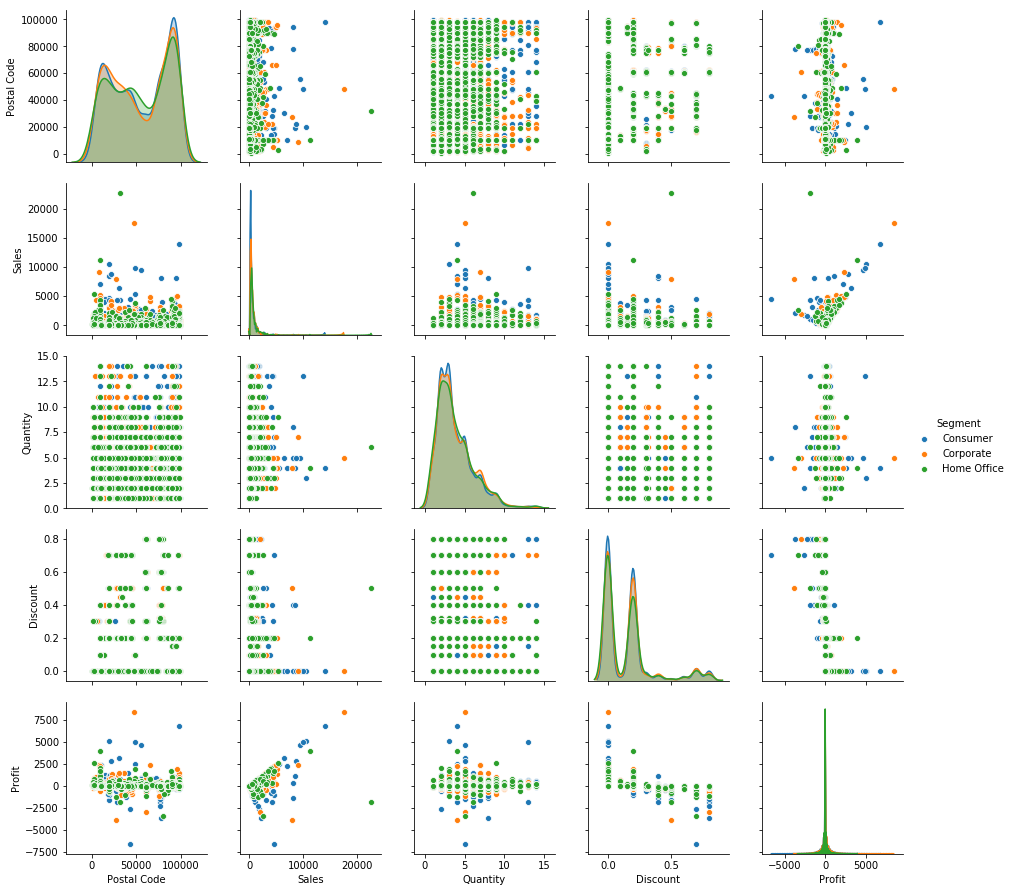

In [9]:
sns.pairplot(data,hue='Segment')

In [10]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


# Heatmap for Correlation

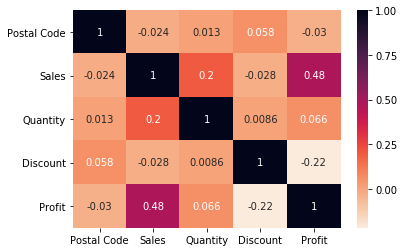

In [12]:
sns.heatmap(data.corr(),cmap='rocket_r',annot=True)

from the above heatmap:
1)Sales and Profit are Moderately Correlated.
2)Discount and Profit are Negatively Correlated
3)Quantity and Profit are less Moderately Correlated.

# Count Plot of each column

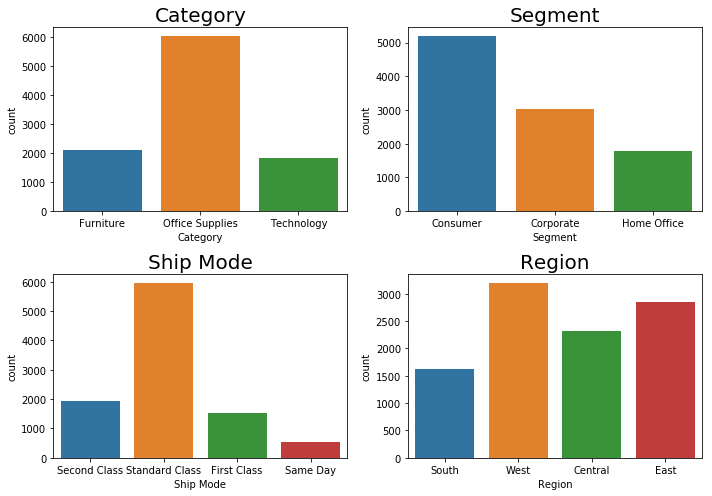

In [14]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));
sns.countplot(data['Category'],ax=axs[0][0])
sns.countplot(data['Segment'],ax=axs[0][1])
sns.countplot(data['Ship Mode'],ax=axs[1][0])
sns.countplot(data['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)

plt.tight_layout()

Text(0.5, 1.0, 'Sub-Category')

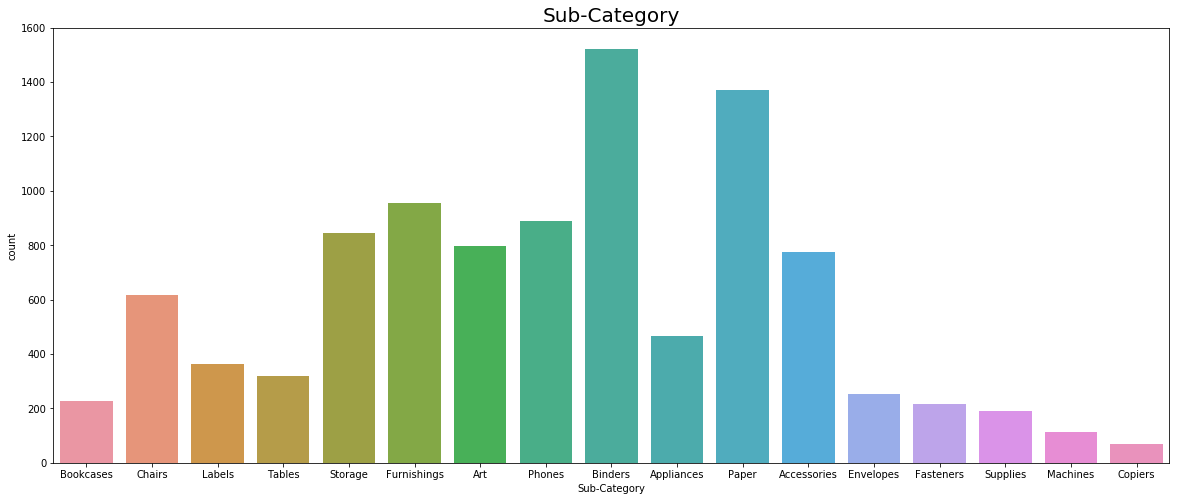

In [19]:
plt.figure(figsize=(20,8))
sns.countplot(data['Sub-Category'])
plt.title("Sub-Category",fontsize=20)

Text(0.5, 1.0, 'State')

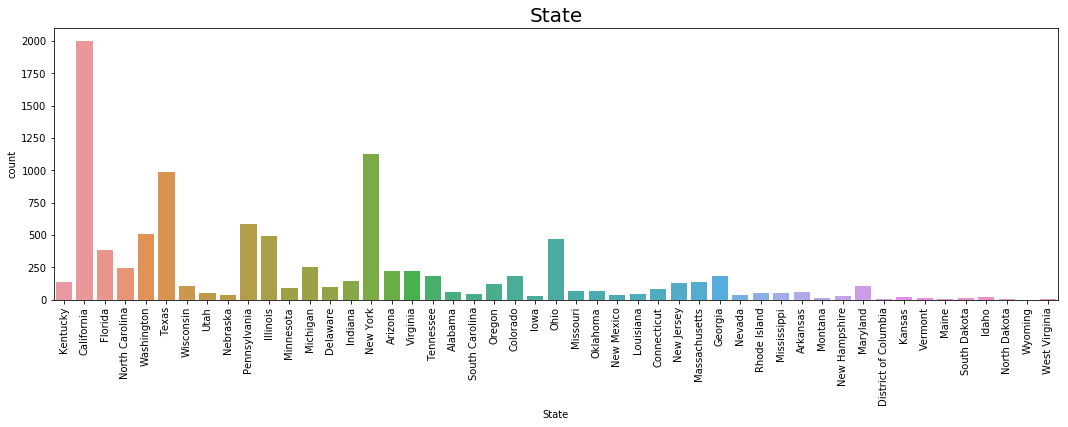

In [20]:
plt.figure(figsize=(18,5))
sns.countplot(data['State'])
plt.xticks(rotation=90)
plt.title("State",fontsize=20)

Text(0.5, 1.0, 'Quantity')

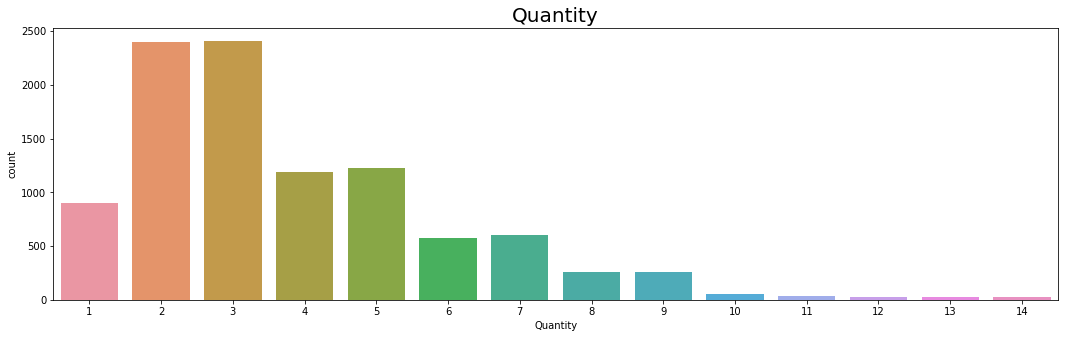

In [21]:
plt.figure(figsize=(18,5))
sns.countplot(data['Quantity'])
plt.title("Quantity",fontsize=20)

Text(0.5, 1.0, 'Discount')

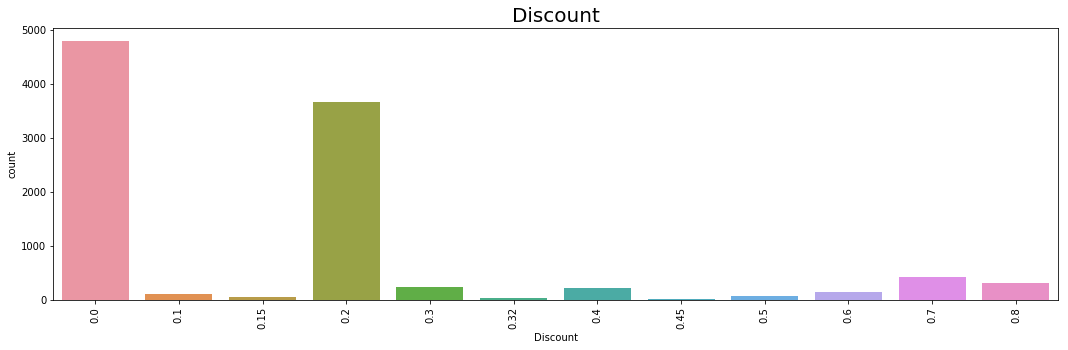

In [22]:
plt.figure(figsize=(18,5))
sns.countplot(data['Discount'])
plt.xticks(rotation=90)
plt.title("Discount",fontsize=20)

# Distribution Of The Data Using The Plot

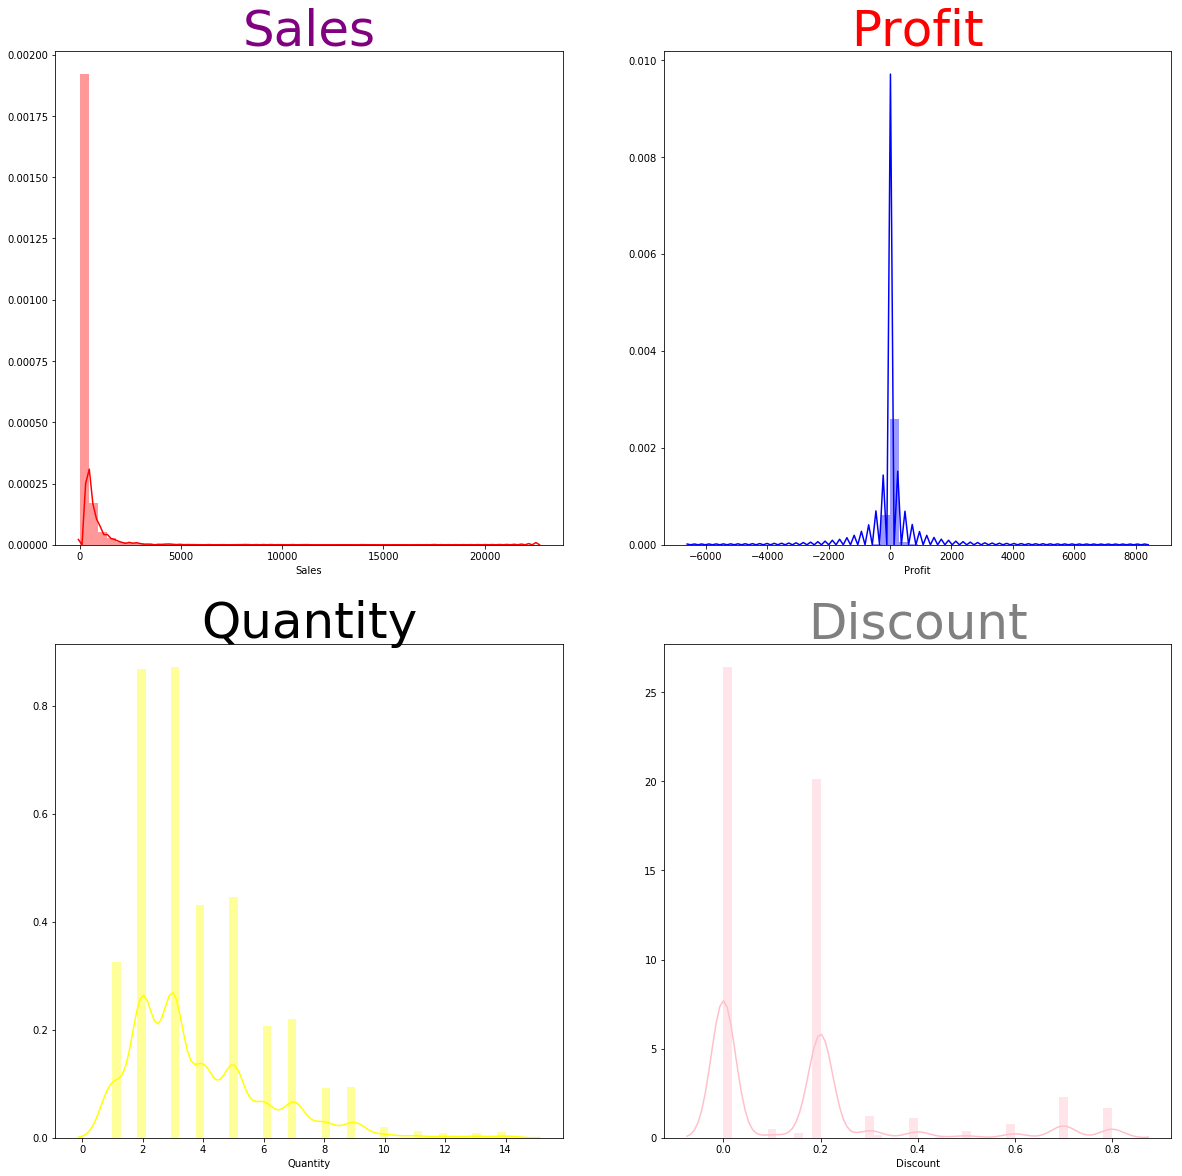

In [24]:
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(20,20))
sns.distplot(data["Sales"],color='red',ax=axs[0][0])
sns.distplot(data["Profit"],color='blue',ax=axs[0][1])
sns.distplot(data["Quantity"],color='yellow',ax=axs[1][0])
sns.distplot(data["Discount"],color='Pink',ax=axs[1][1])
axs[0][0].set_title("Sales",color='Purple',fontsize=50)
axs[0][1].set_title("Profit",color='red',fontsize=50)
axs[1][0].set_title("Quantity",color="black",fontsize=50)
axs[1][1].set_title("Discount",color="grey",fontsize=50)
plt.show()

# Statewise Deal Analysis

In [27]:
dataState=data['State'].value_counts()
dataState.head()

California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: State, dtype: int64

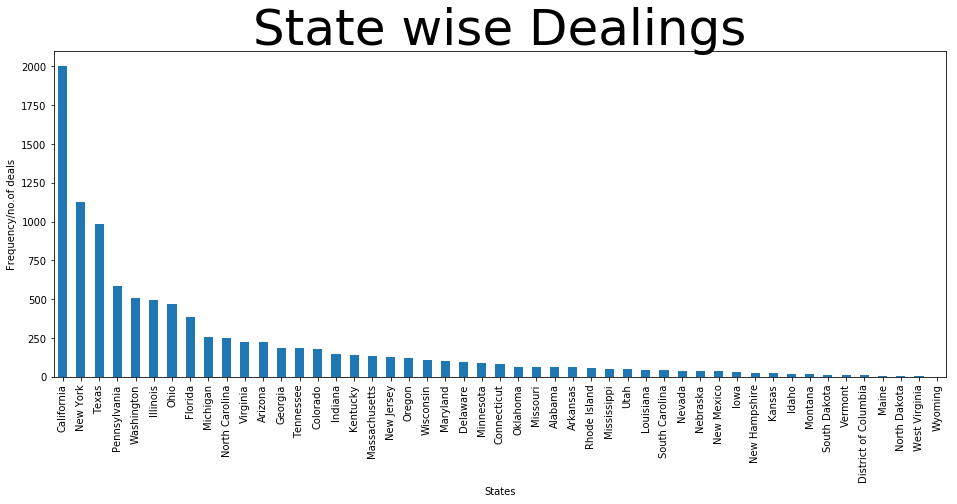

In [28]:
dataState.plot(kind='bar',figsize=(16,6))
plt.ylabel("Frequency/no.of deals")
plt.xlabel("States")
plt.title("State wise Dealings",fontsize=50)
plt.show()

top statewise dealings are:
California, New York, Texas


with lowest being Wyonming

In [29]:
data['State'].value_counts().mean()

203.9591836734694

**Average number of deals per state in US is 204**

# City Wise Analysis of Dealing

In [53]:
dataCity=data["City"].value_counts()
dataCity=dataCity.head(50)

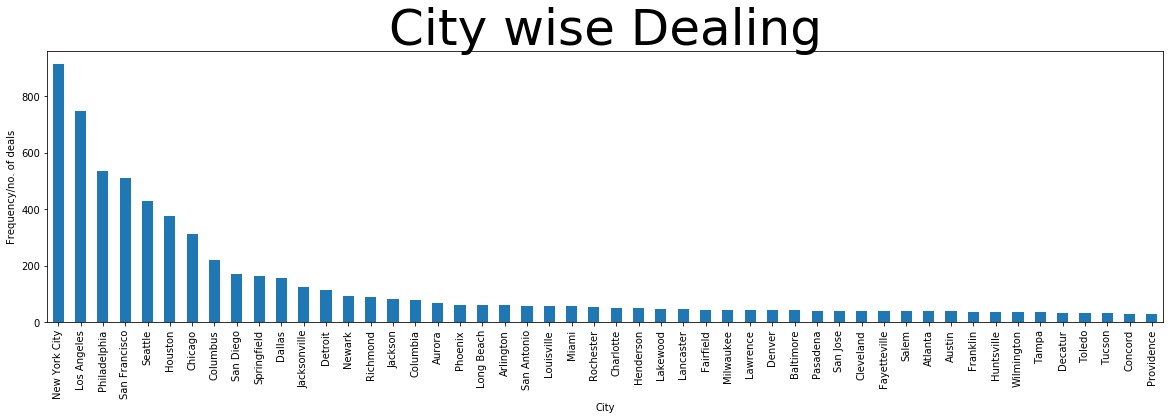

In [54]:
dataCity.plot(kind='bar',figsize=(20,5))
plt.xlabel("City")
plt.ylabel("Frequency/no. of deals")
plt.title("City wise Dealing",fontsize=50)
plt.show()

**Top 3 Cities in US where deals are highest are:
1)New York
2)Los Angeles
3)Philadelphia**

In [55]:
data["City"].value_counts().mean()

18.821092278719398

**Average number of deals per city is 19**


# Segment Wise Analysis of Profit, Discount and Sales

In [57]:
data["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [60]:
dataSegment=data.groupby(['Segment'])[['Profit','Discount','Sales']].mean()
dataSegment

,Profit,Discount,Sales
Segment,,,
Consumer,25.836873,0.158141,223.733644
Corporate,30.456667,0.158228,233.823300
Home Office,33.818664,0.147128,240.972041


Text(0.5, 1.0, 'Segment wise analysis of profit,sales and discount')

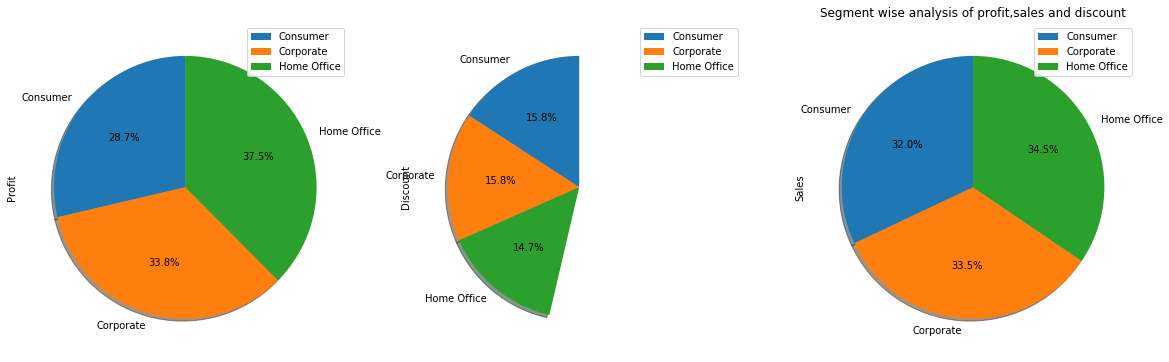

In [65]:
dataSegment.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(20,50),startangle=90,shadow=True,labels=dataSegment.index)
plt.title("Segment wise analysis of profit,sales and discount")

**Profit:**

- Home office=37.5%
- Corporate=33.8%
- Consumer=28.7%

**Discount:**

- Consumer=15.8%
- Corporate=15.8%
- Home office=14.7%

**Sales:**

- Home office=34.5%
- Corporate=33.5%
- Consumer=32.0%

# Statewise Analysis of Profit, Sales and Discount

In [72]:
dataStatePSD=data.groupby(['State'])[['Profit','Sales','Discount']].mean()
dataStatePSD.head(10)

,Profit,Sales,Discount
State,,,
Alabama,94.865989,319.846557,0.000000
Arizona,-15.303235,157.508933,0.303571
Arkansas,66.811452,194.635500,0.000000
California,38.171608,228.729451,0.072764
Colorado,-35.867351,176.418231,0.316484
Connecticut,42.823071,163.223866,0.007317
Delaware,103.930988,285.948635,0.006250
District of Columbia,105.958930,286.502000,0.000000
Florida,-8.875461,233.612815,0.299347


**1)Statewise Analysis of Profit**

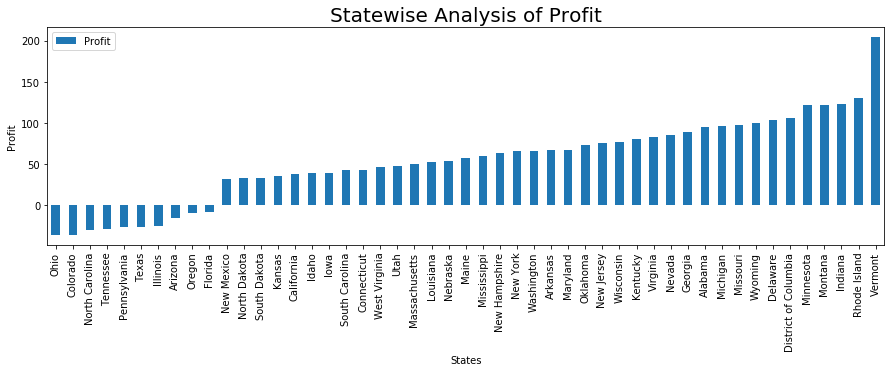

In [74]:
dataStateP=dataStatePSD.sort_values("Profit")
dataStateP[["Profit"]].plot(kind='bar',figsize=(15,4))
plt.title("Statewise Analysis of Profit",fontsize=20)
plt.xlabel("States")
plt.ylabel("Profit")
plt.show()

- Highest Profit=Vermont
- Lowest Profit=Ohio

**2)Statewise Analysis of Sale**

Text(0.5, 1.0, 'Statewise analysis of Sales')

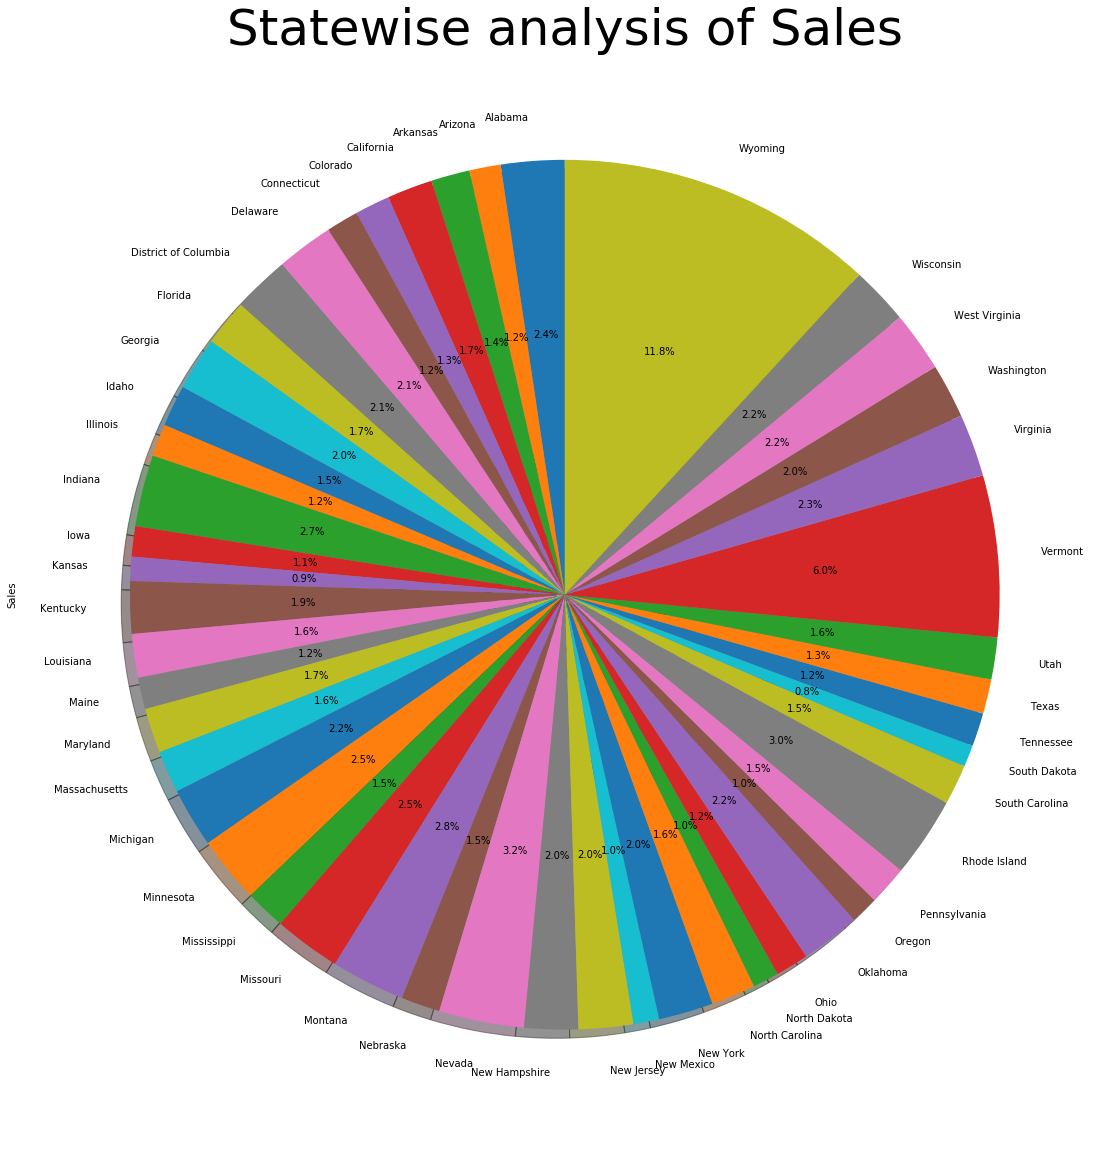

In [75]:
dataStatePSD["Sales"].plot.pie(figsize=(20,20),autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Statewise analysis of Sales", fontsize=50)

- Highest Sales=Wyoming(11.8%)
- Lowest Sales=South Dakota(0.8%)

**3)Statewise Analysis of Discount**

Text(0, 0.5, 'Discount')

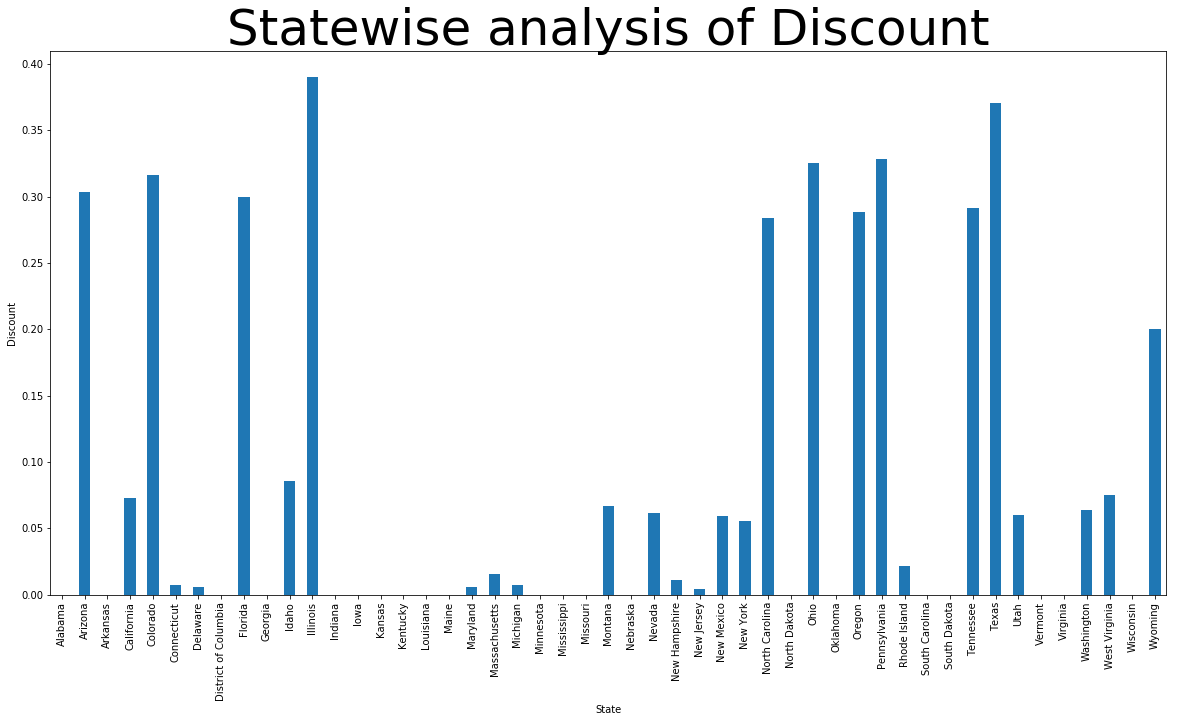

In [76]:
dataStatePSD["Discount"].plot(kind="bar",figsize=(20,10))
plt.title("Statewise analysis of Discount",fontsize=50)
plt.xlabel("State")
plt.ylabel("Discount")

**Illinois gives the Highest Discount**


# Citywise Analysis of Profit

In [81]:
dataCityP=data.groupby(['City'])[['Sales','Discount','Profit']].mean()
dataCityP=dataCityP.sort_values('Profit')
dataCityP.head()

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


Text(0.5, 1.0, 'Citywise analysis of Profit')

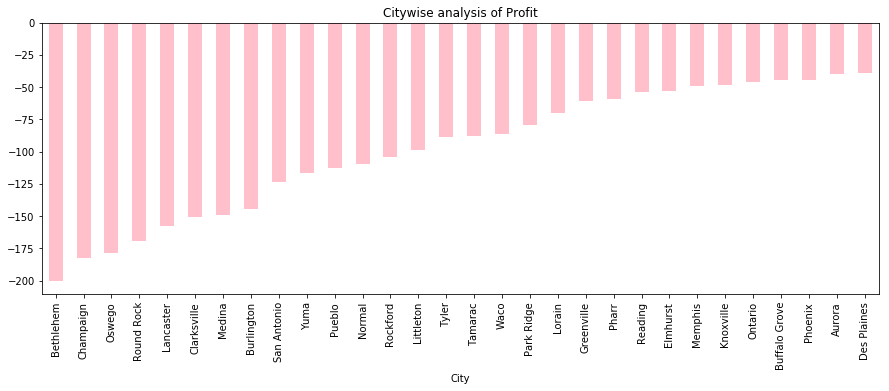

In [82]:
dataCityP["Profit"].head(30).plot(kind='bar',figsize=(15,5),color="pink")
plt.title("Citywise analysis of Profit")

Text(0.5, 1.0, 'Citywise analysis of Profit')

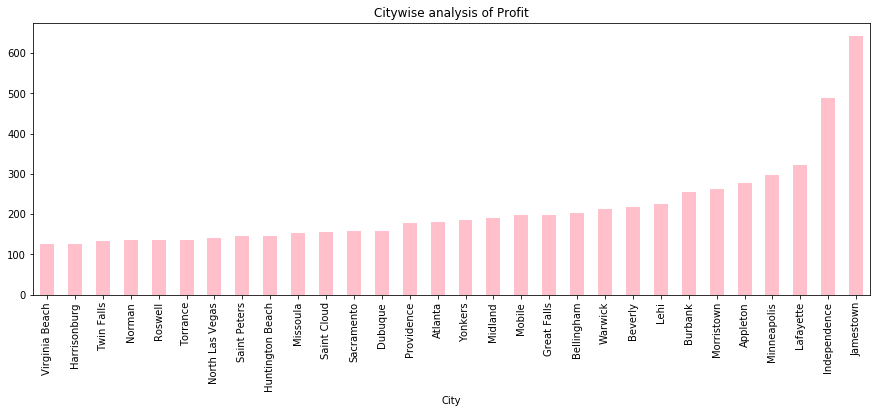

In [83]:
dataCityP["Profit"].tail(30).plot(kind='bar',figsize=(15,5),color="pink")
plt.title("Citywise analysis of Profit")

**30 cities has positive profit and 30 cities has negative profit**

# Quantitywise Analyis Of Profit, Sales and Discount 

In [86]:
dataQuantity=data.groupby(['Quantity'])[['Sales','Profit','Discount']].mean()
dataQuantity.head(10)

,Sales,Profit,Discount
Quantity,,,
1,59.234632,8.276396,0.152959
2,120.354488,16.006831,0.154858
3,175.201578,23.667715,0.153329
4,271.764059,37.131310,0.157708
5,337.936339,40.257394,0.157146
6,362.101960,18.051517,0.166556
7,395.888393,56.579163,0.161980
8,458.210802,42.244342,0.171595
9,498.083683,68.557716,0.147946


Text(0.5, 1.0, 'Quantity wise Analysis of Profit, Discount and Profit')

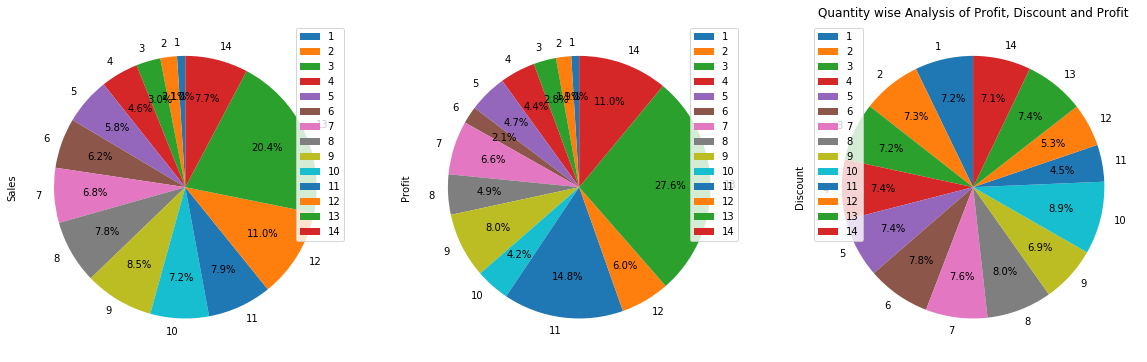

In [87]:
#1)Sales,2)Discount,3)Profit
dataQuantity.plot.pie(subplots=True,figsize=(20,18),autopct='%1.1f%%',pctdistance=0.69,startangle=90,labels=dataQuantity.index)
plt.title("Quantity wise Analysis of Profit, Discount and Profit")

**13 number of Quantity are high on Sales and Profit**

# Category wise Analysis of Profit, Sales and Discount

In [90]:
dataCat=data.groupby(['Category'])[['Sales','Profit','Discount']].mean()
dataCat

,Sales,Profit,Discount
Category,,,
Furniture,349.834887,8.699327,0.173923
Office Supplies,119.324101,20.327050,0.157285
Technology,452.709276,78.752002,0.132323


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014C86593470>,
      dtype=object)

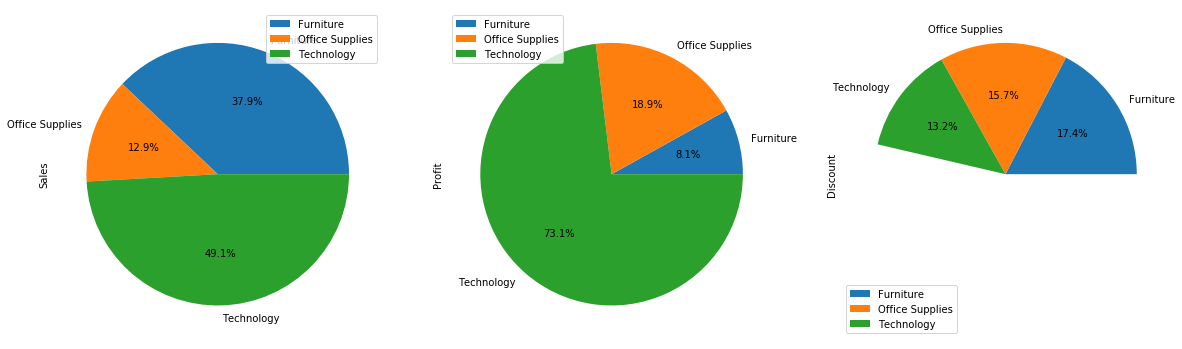

In [91]:
dataCat.plot.pie(subplots=True,figsize=(20,18),autopct='%1.1f%%',label=dataCat.index)

- Highest sales= Technology(49.1%)
- Highest Profit= Technology(73.1%)
- minimum profit= Furniture(8.1%)

# Sub-Category wise Analysis of Profit, Sales and Discount

In [93]:
dataSub=data.groupby(['Sub-Category'])[['Sales','Profit','Discount']].mean()
dataSub

,Sales,Profit,Discount
Sub-Category,,,
Accessories,215.974604,54.111788,0.078452
Appliances,230.755710,38.922758,0.166524
Art,34.068834,8.200737,0.074874
Binders,133.560560,19.843574,0.372292
Bookcases,503.859633,-15.230509,0.211140
Chairs,532.332420,43.095894,0.170178
Copiers,2198.941618,817.909190,0.161765
Envelopes,64.867724,27.418019,0.080315
Fasteners,13.936774,4.375660,0.082028


**1)Based on Sales**

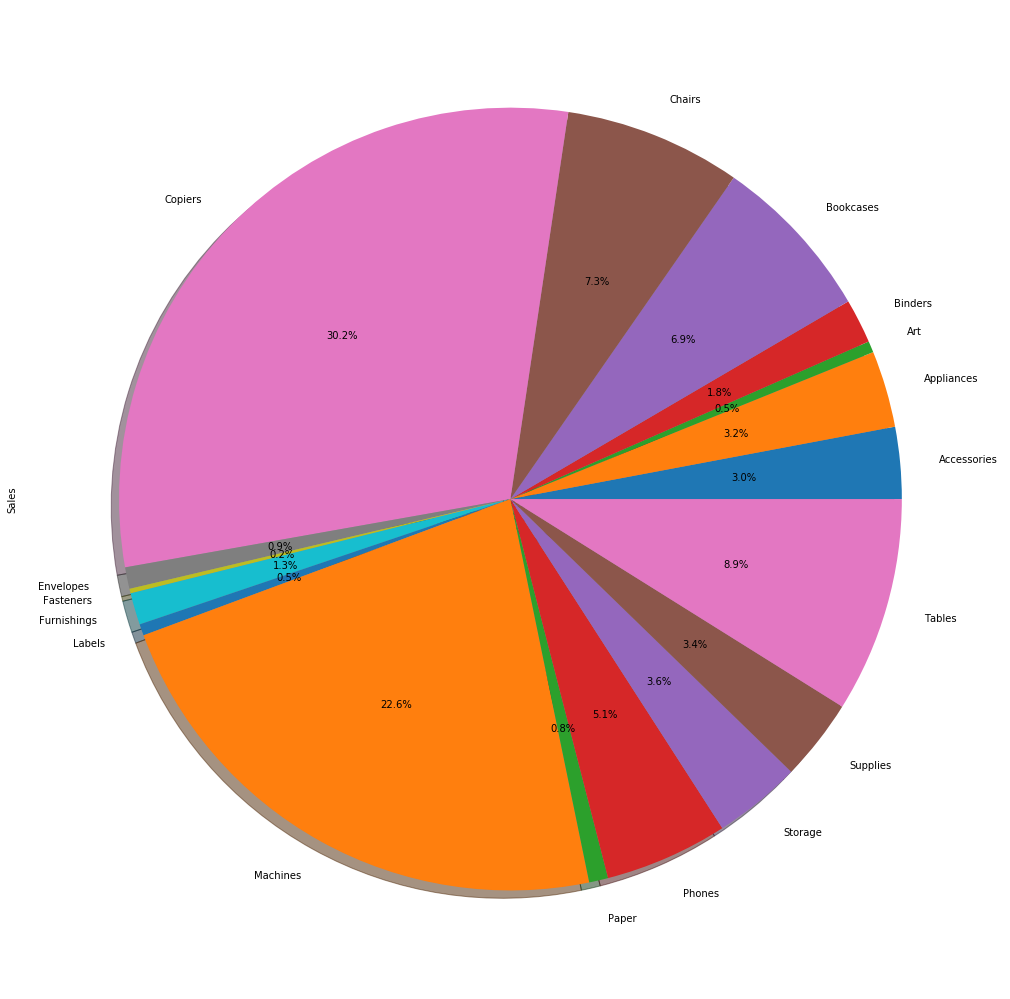

In [97]:
dataSub['Sales'].plot.pie(figsize=(20,18),autopct='%1.1f%%',shadow=True,labels=dataSub.index)

- Highest Sales= Copier
- Second Highest= Machines

**2)Based on Discount**

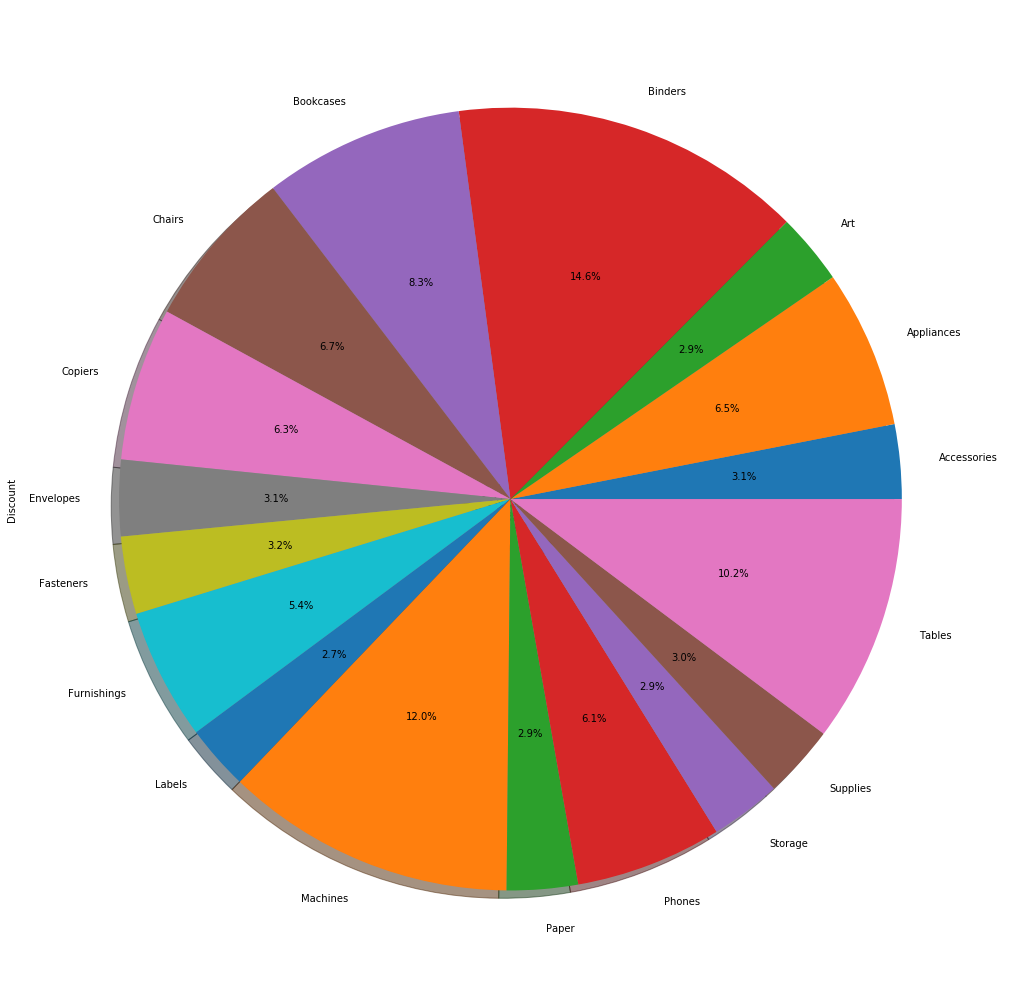

In [98]:
dataSub['Discount'].plot.pie(figsize=(20,18),autopct='%1.1f%%',shadow=True,labels=dataSub.index)

- highest discount=Binders
- second highest= Machines

**3)Based on Profit**

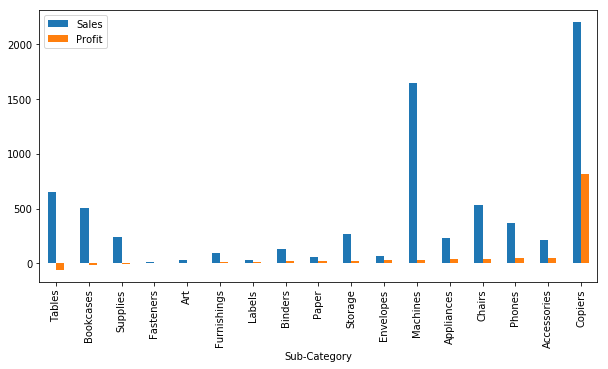

In [99]:
dataSub.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',figsize=(10,5),label=['average sales price','profit'])

**Copier has highest sales as well as profit**

# Region wise analysis of Profit, Sales and Discount

In [103]:
dataRegion=data.groupby(['Region'])[['Sales','Profit','Discount']].mean()
dataRegion

,Sales,Profit,Discount
Region,,,
Central,215.772661,17.092709,0.240353
East,238.336110,32.135808,0.145365
South,241.803645,28.857673,0.147253
West,226.493233,33.849032,0.109335


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014C81A59390>,
      dtype=object)

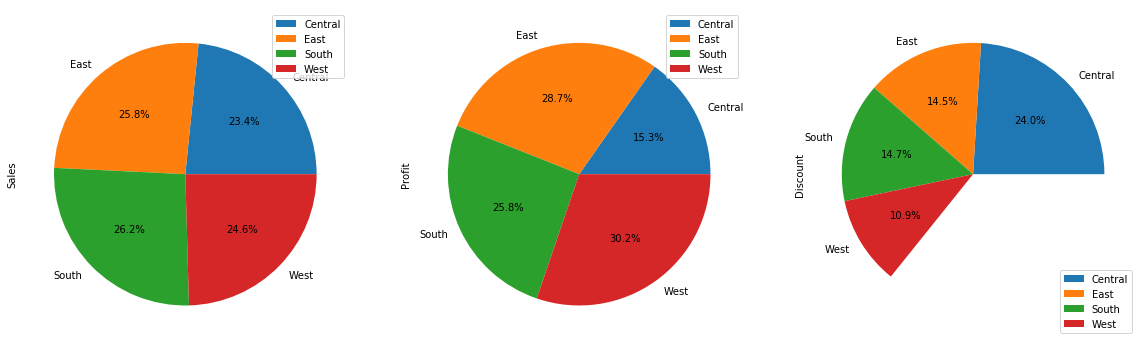

In [104]:
dataRegion.plot.pie(subplots=True,figsize=(20,20),autopct='%1.1f%%',label=dataRegion.index)


**West has the Maximum Profit**

# Shipmode wise Analysis of Profit, Sales and Discount

In [105]:
dataShip=data.groupby(['Ship Mode'])[['Sales','Profit','Discount']].mean()
dataShip

,Sales,Profit,Discount
Ship Mode,,,
First Class,228.497024,31.839948,0.164610
Same Day,236.396179,29.266591,0.152394
Second Class,236.089239,29.535545,0.138895
Standard Class,227.583067,27.494770,0.160023


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014C82175710>,
      dtype=object)

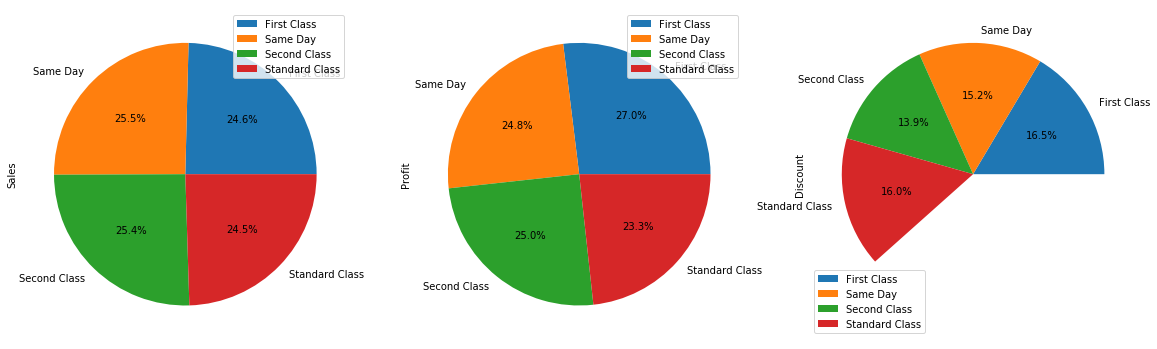

In [106]:
dataShip.plot.pie(subplots=True,figsize=(20,20),autopct='%1.1f%%',label=dataShip.index)

**Profit and Discount are high inn first Class, Sales is high for the same day ship**

# Result and Conclusion

- Profit is more than that of sale but there are some areas where profit could be increased.

- Profit and Discount is high in First Class

- Sales is high for Same day ship

- Sub-category: Copier: High Profit & sales

- Sub-category: Binders , Machines and then tables have high Discount.

- Category: Maximun sales and Profit obtain in Technology.

- Category: Minimun profit obtain in Furniture

- State: Vermont: Highest Profit

- State: Ohio: Lowest Profit

- Segment: Home-office: High Profit & sales

- Here is top 3 city where deals are Highest.

- 1) New York City

- 2) Los Angeles

- 3) Philadelphia

- Sales and Profit are Moderately Correlated.

- Quantity and Profit are less Moderately Correlated.

- Discount and Profit are Negatively Correlated

- Here is top 3 state where deals are Highest.

- 1) Califonia

- 2) New York

- 3) Texas

- Wyoming : Lowest Number of deal,Highest amount of sales= Wyoming(11.8%)

- Lowest amount of sales= South Dakota(0.8%)